In [16]:
import soccerdata as sd
import pandas as pd

In [3]:
pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.0 MB/s eta 0:00:004.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

In [18]:
seriea_hist = sd.MatchHistory('ESP-La Liga', range(2019, 2024))
games = seriea_hist.read_games()

[05/13/24 08:52:16] INFO     Saving cached data to                                                    ]8;id=888613;file:///Users/christianhellum/Library/Caches/pypoetry/virtualenvs/data-science-project-PFmYB0_u-py3.12/lib/python3.12/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=56174;file:///Users/christianhellum/Library/Caches/pypoetry/virtualenvs/data-science-project-PFmYB0_u-py3.12/lib/python3.12/site-packages/soccerdata/_common.py#92\92]8;;\
                             /Users/christianhellum/soccerdata/data/MatchHistory                                   

/Users/christianhellum/Library/Caches/pypoetry/virtualenvs/data-science-project-PFmYB0_u-py3.12/lib/python3.12/site-packages/soccerdata/_common.py:493: UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"
  warnings.warn(msg, stacklevel=1)


AttributeError: module 'pandas' has no attribute 'games'

In [19]:
games.to_csv("five_thirty_eight_df.csv")

In [9]:
def home_away_results(games: pd.DataFrame):
    """Returns aggregated home/away results per team"""

    res = (
        pd.melt(games.reset_index(),
                id_vars=['date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['home_team', 'away_team']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [10]:
results = home_away_results(games)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team       is_home                                                     
Alaves     Away        12  0.162162      44  0.594595      18  0.243243
           Home        27  0.360000      26  0.346667      22  0.293333
Almeria    Away         3  0.081081      26  0.702703       8  0.216216
           Home        10  0.277778      15  0.416667      11  0.305556
Ath Bilbao Away        22  0.236559      38  0.408602      33  0.354839
           Home        44  0.468085      25  0.265957      25  0.265957

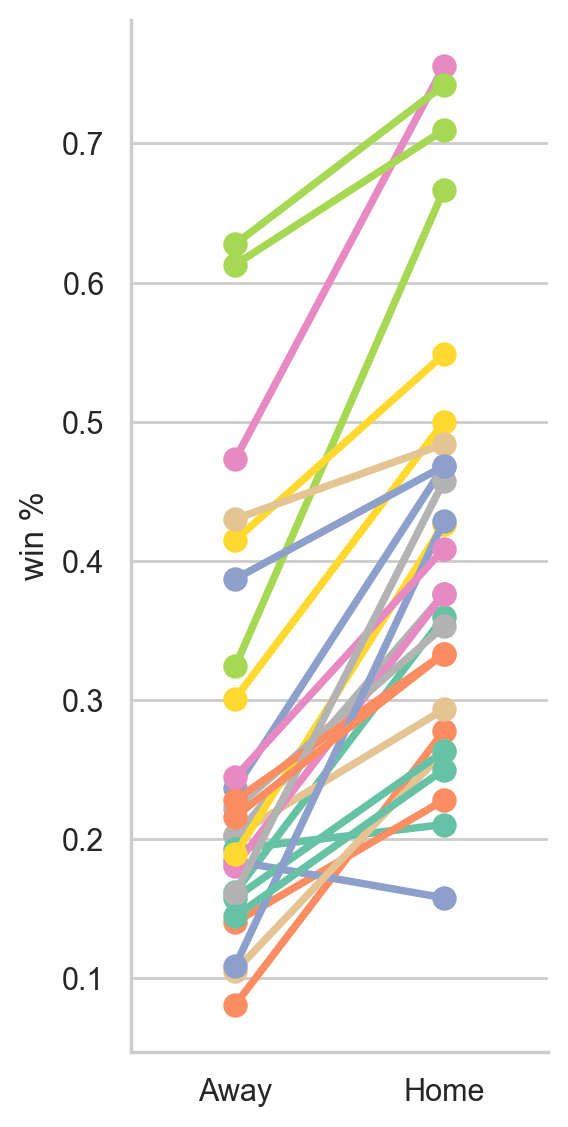

In [11]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette='Set2', height=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');

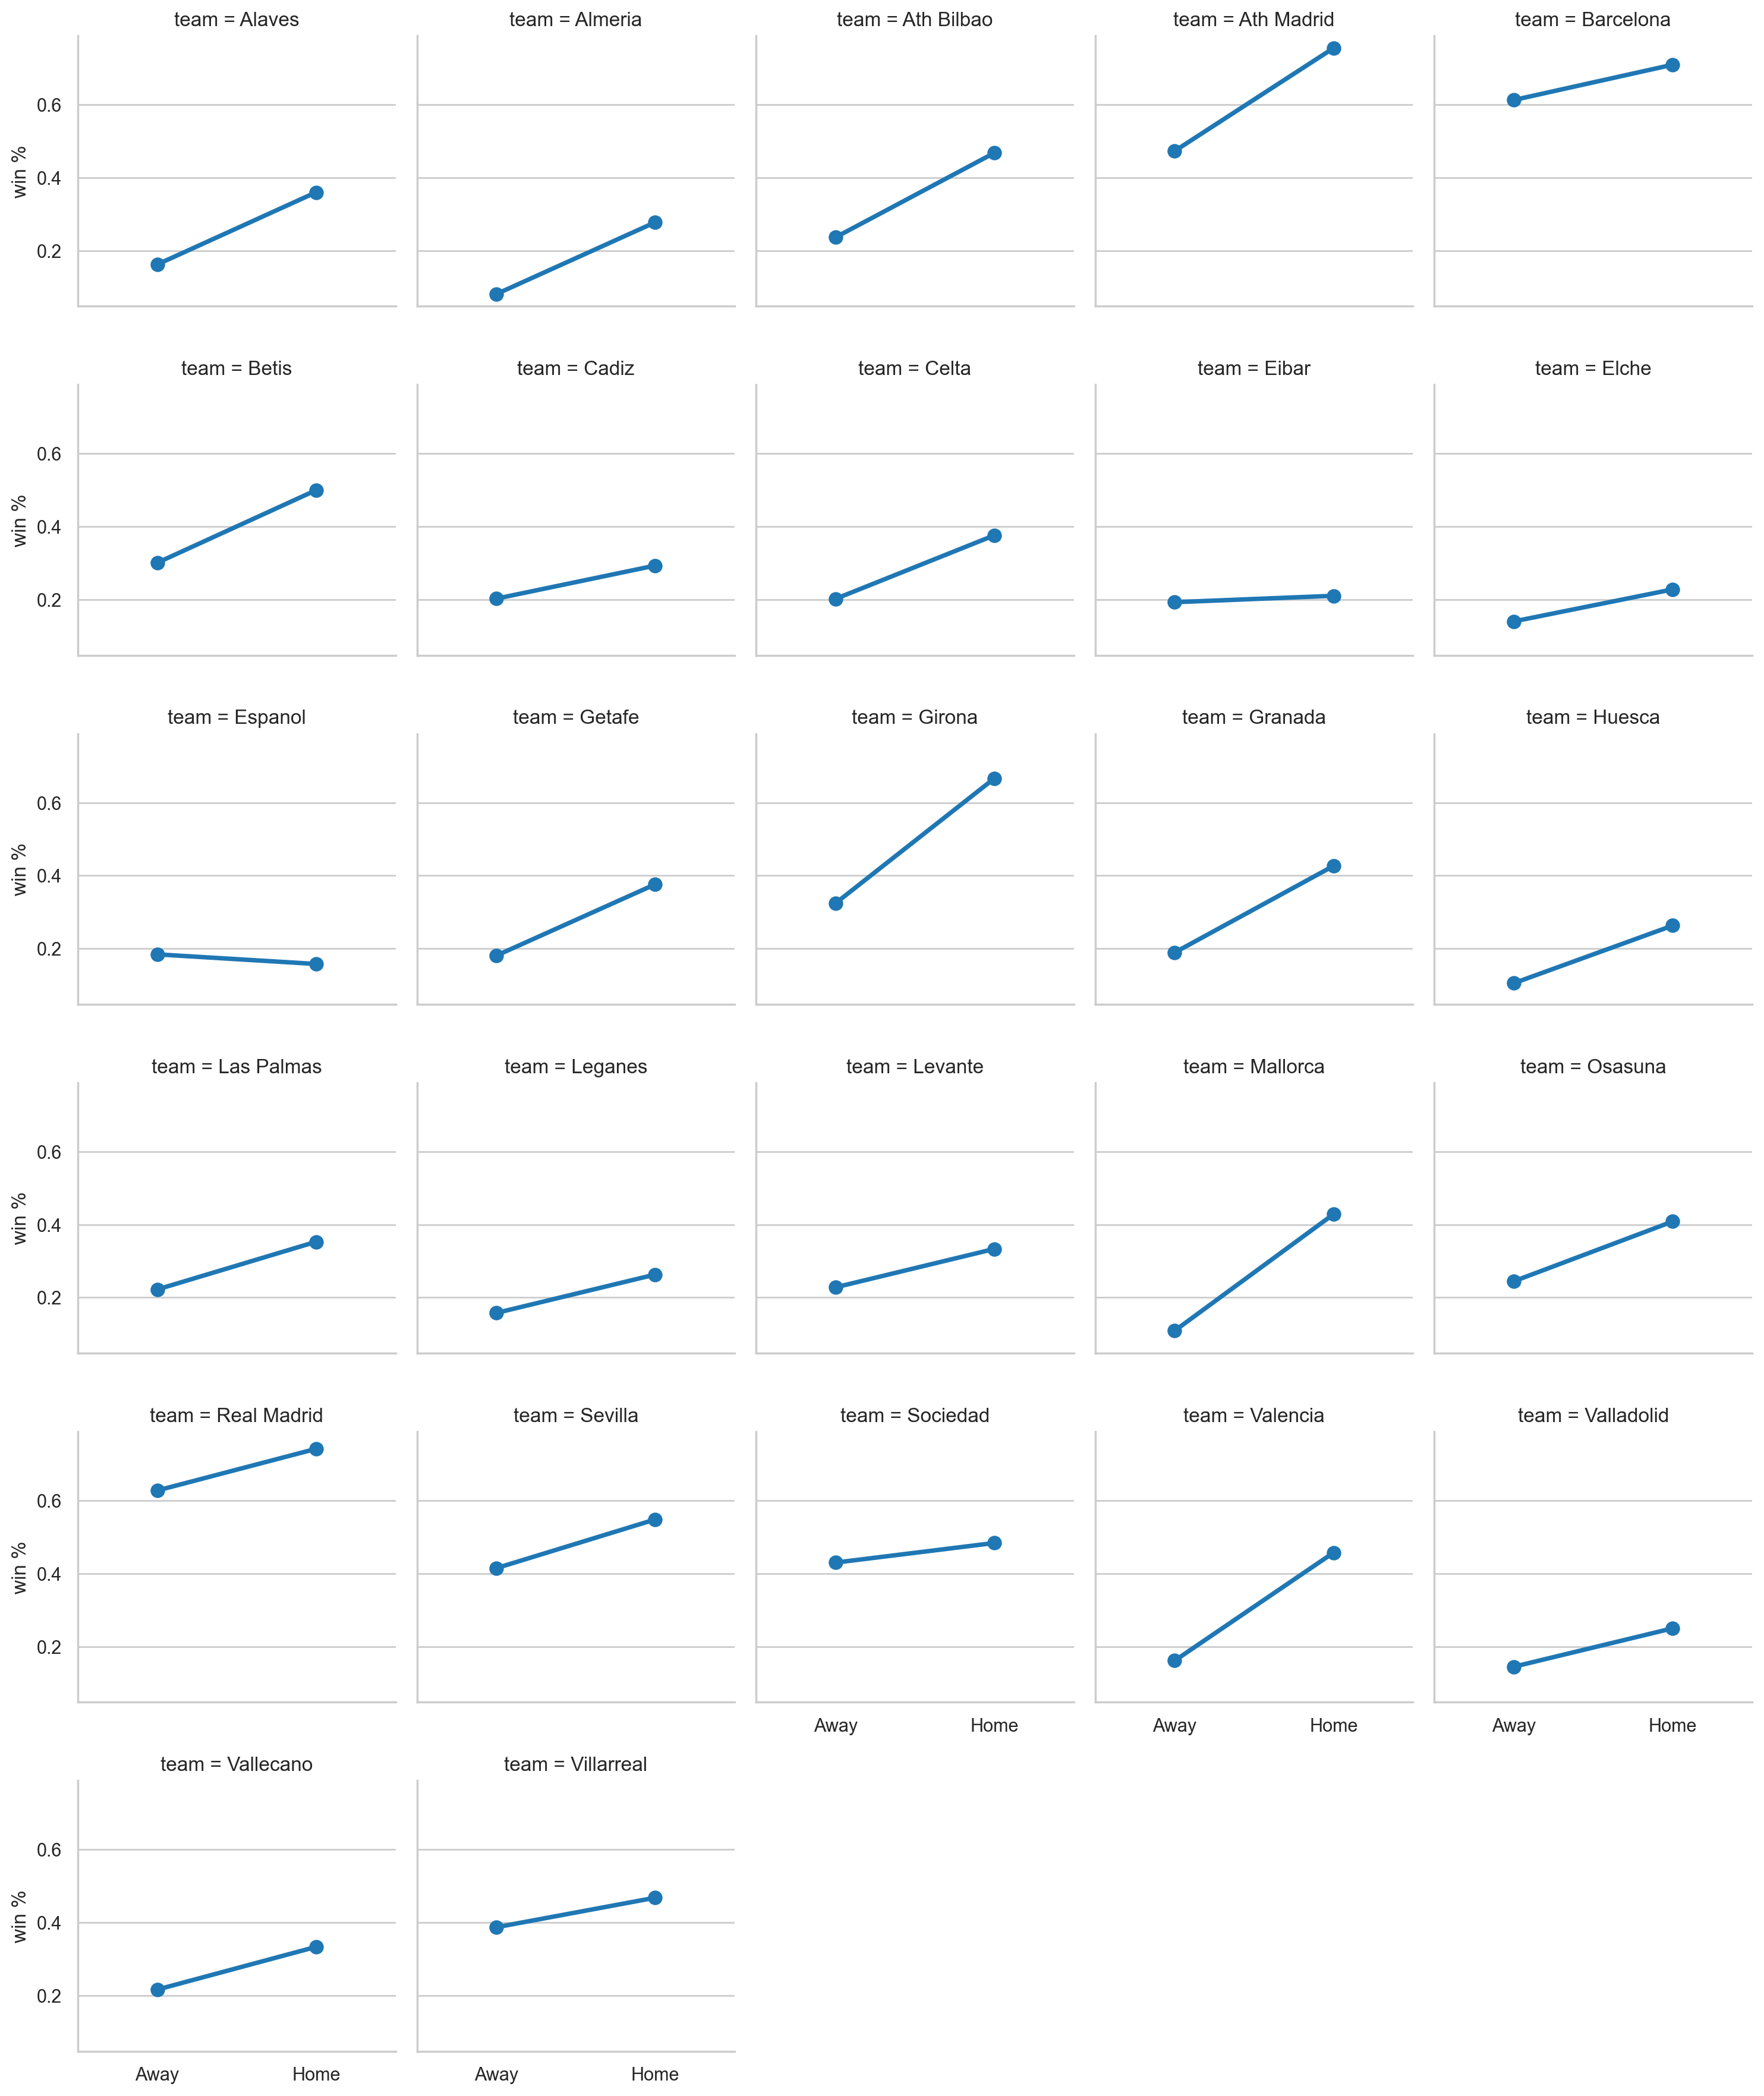

In [12]:
g = sns.FacetGrid(results.reset_index(), col='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');